<a href="https://colab.research.google.com/github/inekeyuliam/MachineLearningFoundations/blob/main/rps_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#      Rock Paper Scissors Machine Learning Foundation Final Project


**Ineke Yulia Margareta**

username : inekeyuliamar

email : inekemargareta20@gamil.com

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-03 11:17:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.88MB/s    in 1m 40s  

2021-07-03 11:18:59 (3.08 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
!pip install split-folders

In [ ]:
import zipfile,os
import splitfolders

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

base_dir = '/tmp/test/rockpaperscissors/rps-cv-images/'
splitfolders.ratio(base_dir, output='/tmp/test/rockpaperscissors/rps-cv-images/', seed=1337, ratio=(.6, .4), group_prefix=None) # default values

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Copying files: 2188 files [00:00, 3525.07 files/s]


In [ ]:
os.listdir('/tmp/test/rockpaperscissors/rps-cv-images/train')

['paper', 'scissors', 'rock']

In [ ]:
os.listdir('/tmp/test/rockpaperscissors/rps-cv-images/val')

['paper', 'scissors', 'rock']

In [ ]:
# membuat direktori paper pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')

# membuat direktori rock pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')

# membuat direktori scissors pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')

# membuat direktori paper pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

# membuat direktori scissors pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

# membuat direktori rock pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

In [ ]:
class_names=os.listdir('/tmp/test/rockpaperscissors/rps-cv-images/train')
print(class_names)

['paper', 'scissors', 'rock']


In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4, 
        class_mode='categorical',
        shuffle=True)


Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=10,
      validation_data=validation_generator,
      validation_steps=len(validation_generator))

Epoch 1/10
328/328 [==============================] - 127s 388ms/step - loss: 0.1875 - accuracy: 0.9345 - val_loss: 0.2492 - val_accuracy: 0.9247
Epoch 2/10
328/328 [==============================] - 128s 391ms/step - loss: 0.1739 - accuracy: 0.9398 - val_loss: 0.1655 - val_accuracy: 0.9475
Epoch 3/10
328/328 [==============================] - 127s 388ms/step - loss: 0.1180 - accuracy: 0.9558 - val_loss: 0.1758 - val_accuracy: 0.9429
Epoch 4/10
328/328 [==============================] - 127s 388ms/step - loss: 0.1233 - accuracy: 0.9573 - val_loss: 0.1591 - val_accuracy: 0.9543
Epoch 5/10
328/328 [==============================] - 127s 387ms/step - loss: 0.1164 - accuracy: 0.9627 - val_loss: 0.1039 - val_accuracy: 0.9646
Epoch 6/10
328/328 [==============================] - 127s 387ms/step - loss: 0.0815 - accuracy: 0.9748 - val_loss: 0.2320 - val_accuracy: 0.9247
Epoch 7/10
328/328 [==============================] - 127s 388ms/step - loss: 0.1146 - accuracy: 0.9627 - val_loss: 0.1929 -

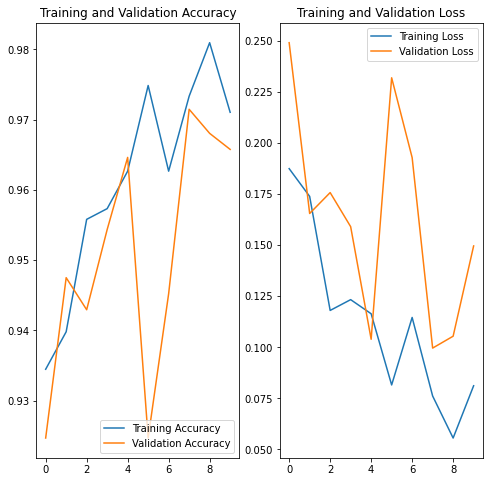

In [ ]:
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving Rock-paper-scissors_(scissors).png to Rock-paper-scissors_(scissors).png
scissors


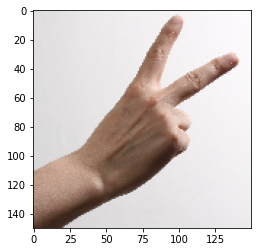

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = keras.preprocessing.image.load_img(
     path, target_size=(150,150)
  )
  imgplot = plt.imshow(img)
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  arr=[]
  predictions = model.predict(img_array)
  arr.append(predictions)
  # print(arr)

  for i in arr:
    # print(i[0][1])
    if i[0][0] == 1: #1.0.0. paper
      print('paper')
    elif i[0][1] == 1: #0.1.0. rock
      print('rock')
    else: #0.0.1. scissors
      print('scissors')
  